In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
# Input data (same setup from earlier)
np.random.seed(42)
X = np.sort(np.random.rand(30))
y = np.sin(2 * np.pi * X) + np.random.randn(30) * 0.1
X = X[:, np.newaxis]

# Range of alpha values (log scale)
alphas = np.logspace(-4, 2, 100)

# Model pipeline: Polynomial (deg=15) + Ridge
model = make_pipeline(PolynomialFeatures(degree=15), Ridge())

# Validation curve
train_scores, val_scores = validation_curve(
    model, X, y,
    param_name='ridge__alpha',
    param_range=alphas,
    scoring='neg_mean_squared_error',
    cv=5
)

# Take mean & std across CV folds
train_mean = -np.mean(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)

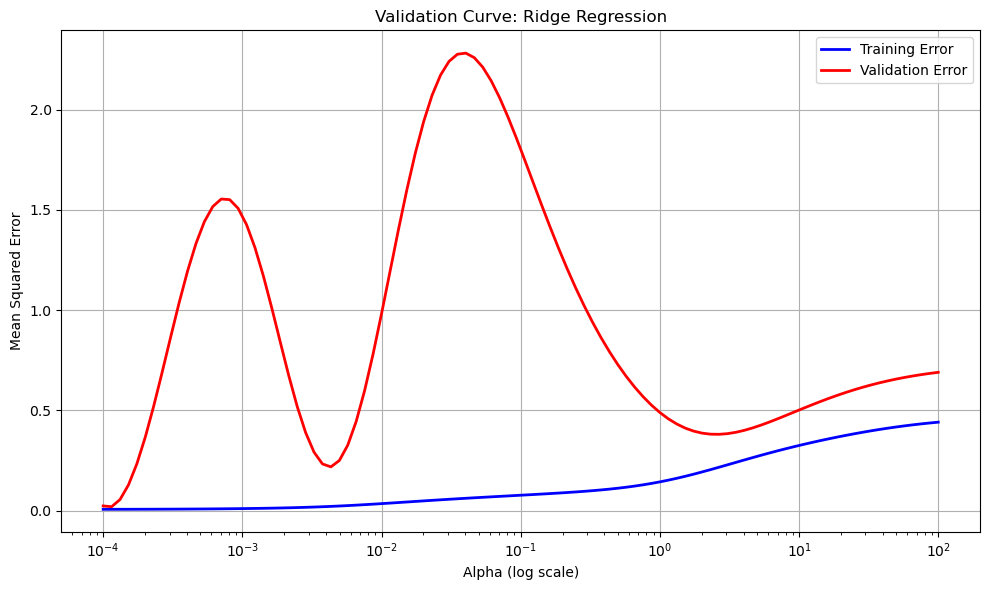

Best alpha based on validation: 0.000115


In [5]:
# Plotting train vs validation error
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_mean, label='Training Error', color='blue', linewidth=2)
plt.semilogx(alphas, val_mean, label='Validation Error', color='red', linewidth=2)
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve: Ridge Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print best alpha
best_alpha = alphas[np.argmin(val_mean)]
print(f"Best alpha based on validation: {best_alpha:.6f}")